### Dataset link- https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants/download

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that we dont get warnings
from warnings import filterwarnings
filterwarnings('ignore')

Columns description
1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed



In [84]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [85]:
df.shape

(51717, 17)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [87]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

##### getting all the features with missing values

In [88]:
null_features=[feature for feature in df.columns if df[feature].isnull().sum()>0]
null_features

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

##### calculating % of null values 

In [89]:
for feature in null_features:
    print('{} =====> {}% null values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate =====> 15.0337% null values
phone =====> 2.3358% null values
location =====> 0.0406% null values
rest_type =====> 0.4389% null values
dish_liked =====> 54.2916% null values
cuisines =====> 0.087% null values
approx_cost(for two people) =====> 0.669% null values


##### Transforming the rate column

In [90]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [91]:
#### Dropping the missing value rows
df.dropna(axis='index',subset=['rate'],inplace=True)


In [92]:
df.shape

(43942, 17)

In [93]:
#### creating function to transform rate column
def splitter(x):
    return x.split('/')[0]

In [94]:
df['rate']=df['rate'].apply(splitter)

In [95]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [96]:
df['rate'].replace('NEW',0,inplace=True)
df['rate'].replace('-',0,inplace=True)
df['rate']=df['rate'].astype(float)

In [97]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 43942, dtype: float64

#### Visualising top 20 restaurants ratings wise

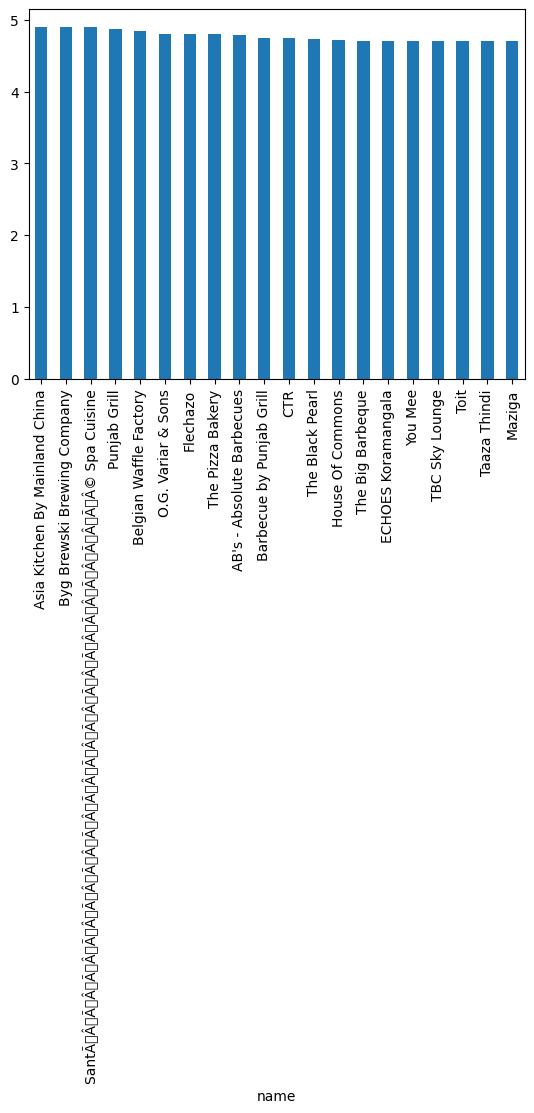

In [98]:
df.groupby('name')['rate'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.show()

#### Creating a dataframe with name and ratings of the restaurants

In [99]:
df_rating=df.groupby('name')['rate'].mean().to_frame()
df_rating=df_rating.reset_index()
df_rating.columns=['Name','Rating']
df_rating.head(10)

,Name,Rating
0,#FeelTheROLL,3.400
1,#L-81 Cafe,3.900
2,#refuel,3.700
3,1000 B.C,3.200
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700
5,11 to 11 Express Biriyanis,3.500
6,1131 Bar + Kitchen,4.500
7,12th Main - Grand Mercure,4.100
8,1441 Pizzeria,4.100
9,1522 - The Pub,4.212


#### Visualising rate column

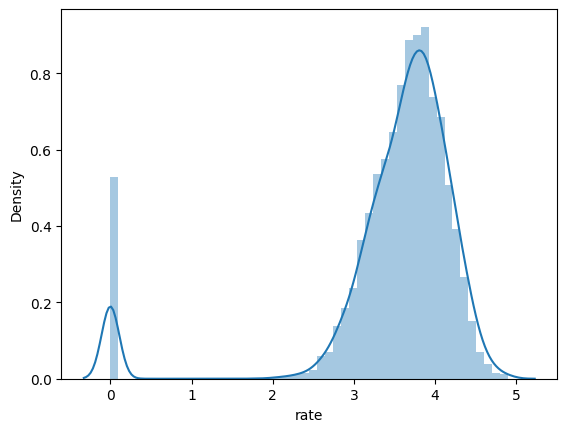

In [100]:

sns.distplot(df['rate'])
plt.show()


#### MOre than 50% of the restaurants ahve ratings in between 3 and 4 

#### Very less restaurants have achienved around 4.5 rating

#### Visualising Top Restaurant chains in Bangalore

In [101]:
chains=df['name'].value_counts().sort_values(ascending=False).head(20)
chains

Cafe Coffee Day        89
Onesta                 85
Empire Restaurant      71
Five Star Chicken      68
Kanti Sweets           68
Just Bake              68
Petoo                  64
Baskin Robbins         63
Pizza Hut              62
Polar Bear             61
KFC                    60
Beijing Bites          60
Domino's Pizza         60
Sweet Truth            60
McDonald's             59
Smoor                  59
Subway                 59
Faasos                 57
Burger King            55
Smally's Resto Cafe    54
Name: name, dtype: int64

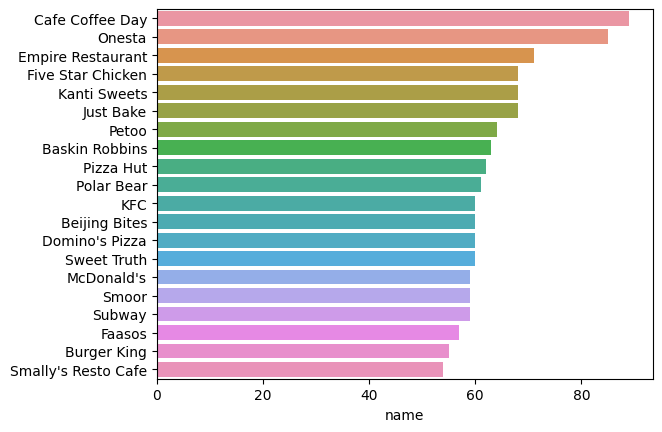

In [102]:
sns.barplot(x=chains,y=chains.index)
plt.show()

#### Online_order column

In [103]:
df['online_order'].value_counts()

Yes    28308
No     15634
Name: online_order, dtype: int64

#### Percentage of restaurants accepting/not accepting online order

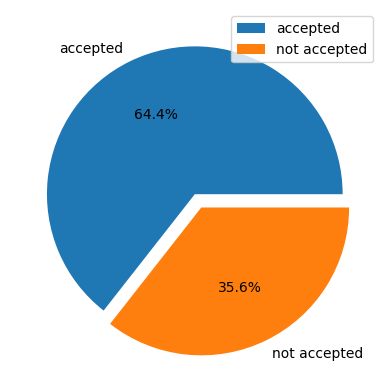

In [104]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%.1f%%')
plt.legend()
plt.show()

#### Visualising Table booking feature

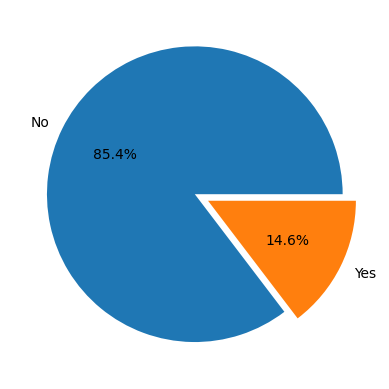

In [105]:

x=df['book_table'].value_counts()
explode=[0.0,0.1]
plt.pie(x,labels=['No','Yes'],explode=explode,autopct='%.1f%%')
plt.show()

#### rest_type column

#### How many type of restaurant we have ?

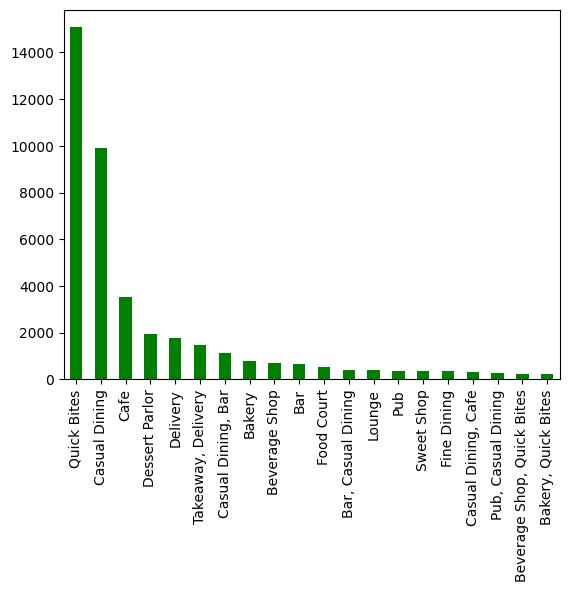

In [106]:
df['rest_type'].value_counts().sort_values(ascending=False).head(20).plot.bar(color='green')
plt.show()

##### most of the restaurants are of quick byte type because of the busy lifestyle of people there, thats why quick byites are more in number

#### Highest voted restaurant

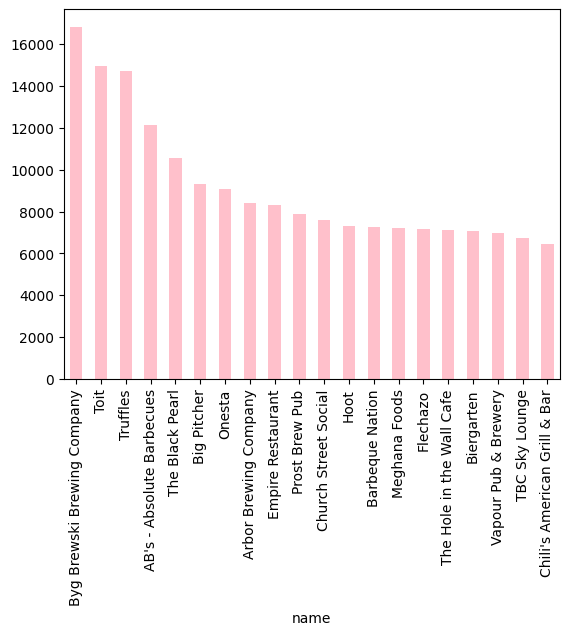

In [107]:
df.groupby( 'name')['votes'].max().nlargest(20).plot.bar(color='pink')
plt.show()

#### Count of restaurants per location

In [108]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [109]:
location=[]
restaurant=[]

for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [110]:
all_restaurants=pd.DataFrame(zip(location,restaurant))
all_restaurants.columns=['location','restaurant']
all_restaurants.set_index('location',inplace=True)
all_restaurants.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


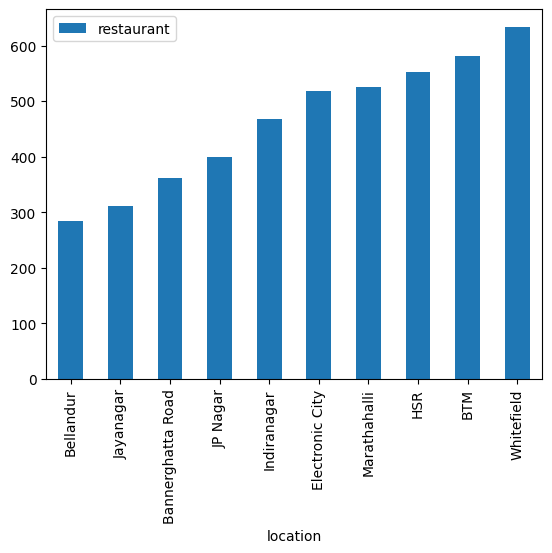

In [111]:
all_restaurants.sort_values(by='restaurant').tail(10).plot.bar()
plt.show()

#### All cuisines

In [112]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

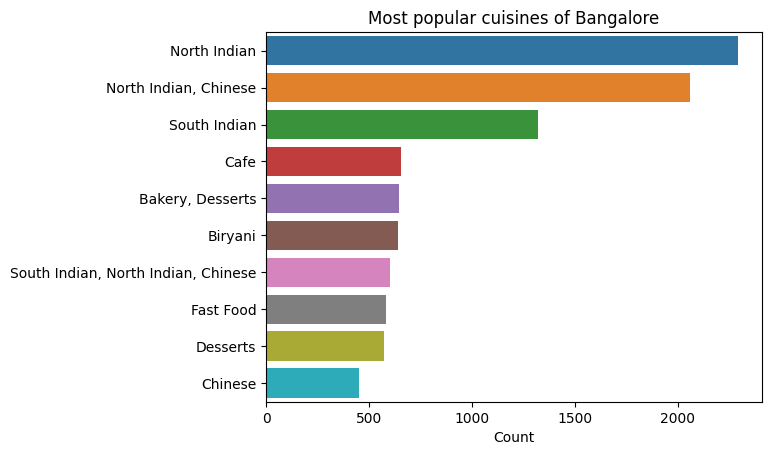

In [113]:
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")
plt.show()

### Most liked cuisine in Bangalore is North idian, Chinese,south indian

In [114]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', nan, '2,200',
       '2,000', '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000',
       '2,800', '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400',
       '2,600', '1,450', '70', '3,200', '560', '240', '360', '6,000',
       '1,050', '2,300', '4,100', '120', '5,000', '3,700', '1,650',
       '2,700', '4,500'], dtype=object)

In [115]:
###dropping the null values
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)


In [116]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')

In [117]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [118]:
df['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500])

#### Visualising cost vs rating

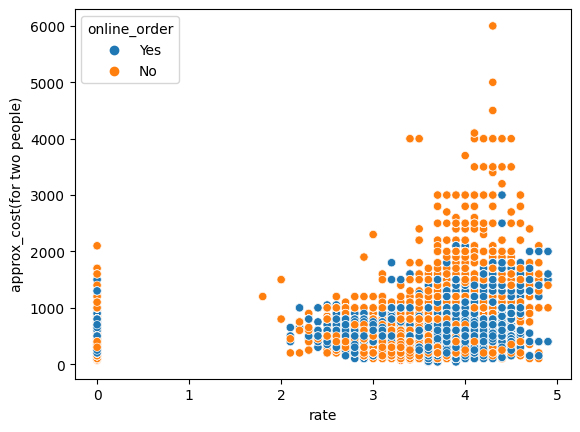

In [119]:
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

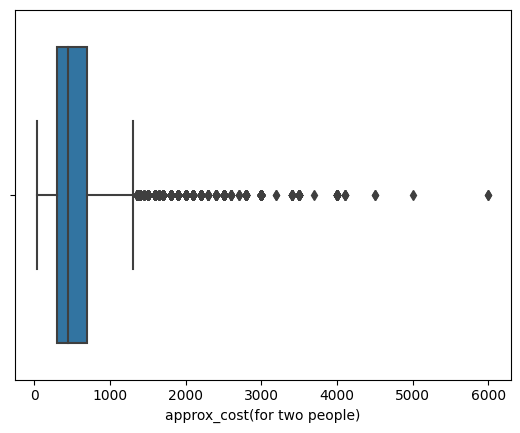

In [120]:
sns.boxplot(df['approx_cost(for two people)'])
plt.show()

#### from scatterplot and boxplot we understand that most of the restaurants who offer online delivery and cost for 2 is under 1000 are highly rated

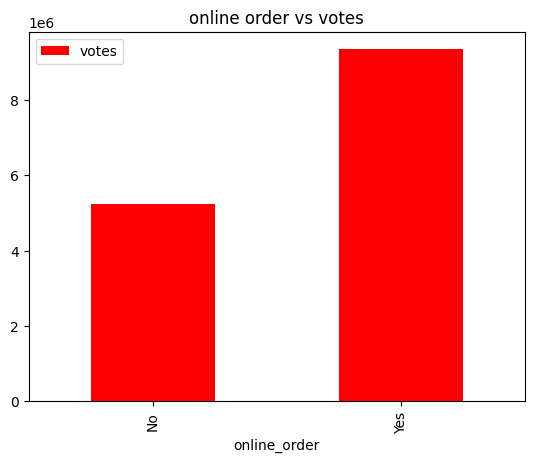

In [121]:
df[['online_order','votes']].groupby('online_order').sum().plot.bar(color='red')
plt.title('online order vs votes')
plt.show()

#### from above visualisation we understand that the restaurants who are offering online delivery are getting more votes 

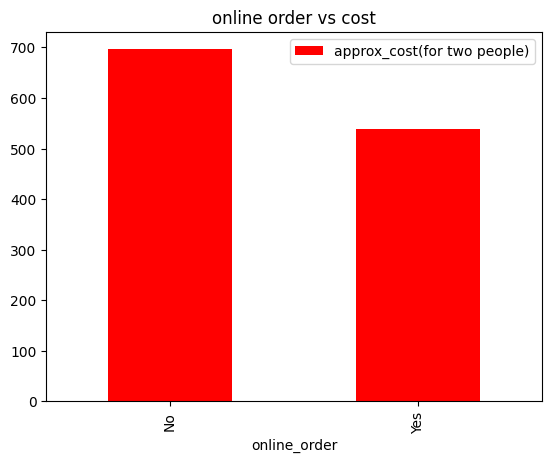

In [122]:
df[['online_order','approx_cost(for two people)']].groupby('online_order').mean().plot.bar(color='red')
plt.title('online order vs cost')
plt.show()

#### Restaurants who are not offering online delivery are more costly than who are offering online delivery

In [123]:
df['approx_cost(for two people)'].describe()

count    43690.000000
mean       594.270222
std        458.761551
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

#### cheapest restauran offers meal for two at rs 40 and costliest restaurant offers meal for two people at rs 6000

In [124]:
df[df['approx_cost(for two people)']==6000]['name'] ####Costliest restaurant

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [125]:
df[df['approx_cost(for two people)']==40]['name'] ####Cheapest restaurant

5270     Srinidhi Sagar Food Line
12232    Srinidhi Sagar Food Line
14819    Srinidhi Sagar Food Line
17773              Srinidhi Sagar
18891    Srinidhi Sagar Food Line
27091       Srinidhi Sagar Deluxe
29785       Srinidhi Sagar Deluxe
32485              Srinidhi Sagar
Name: name, dtype: object

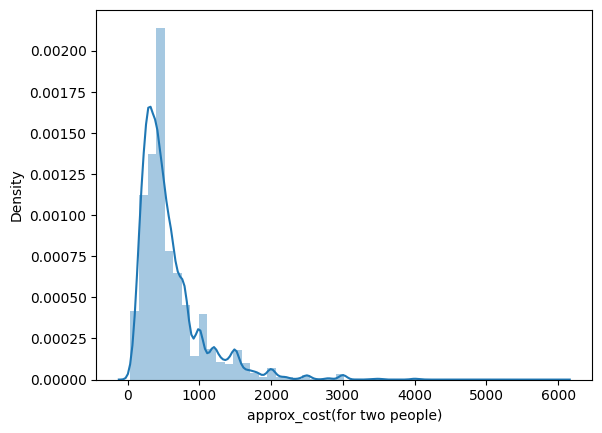

In [126]:
sns.distplot(df['approx_cost(for two people)'])
plt.show()

#### Most of the restaurants charge under 1000 and very few are luxurious

In [127]:
data=df.copy()
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [128]:
data.set_index('name',inplace=True)

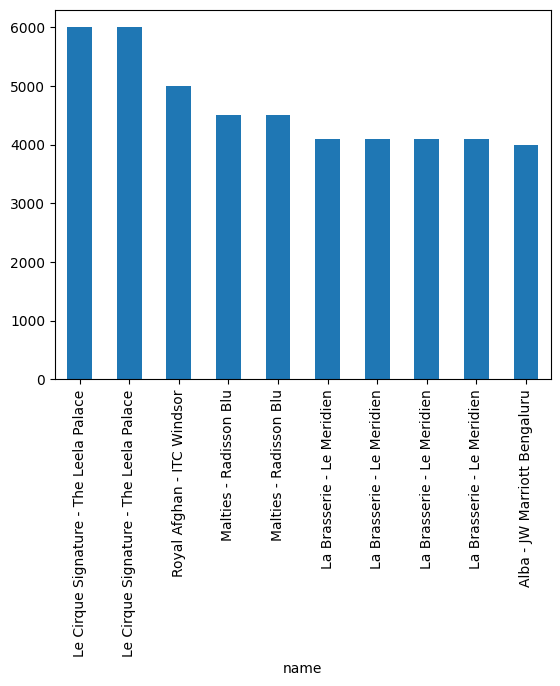

In [129]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()
plt.show()

#### Top cheapest restaurants

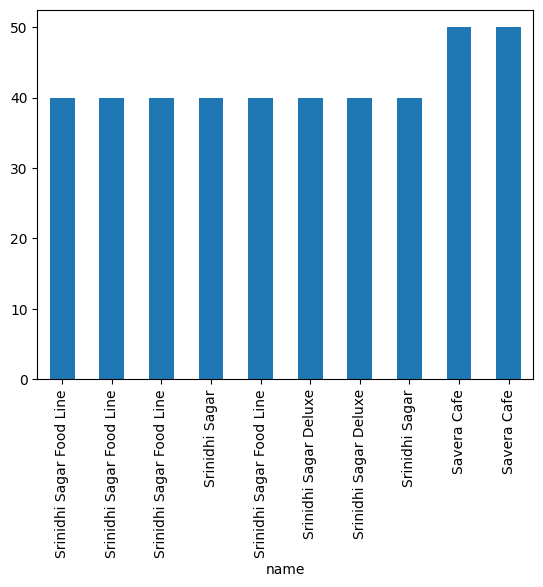

In [130]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()
plt.show()

#### top 10 costliest restaurants location wise

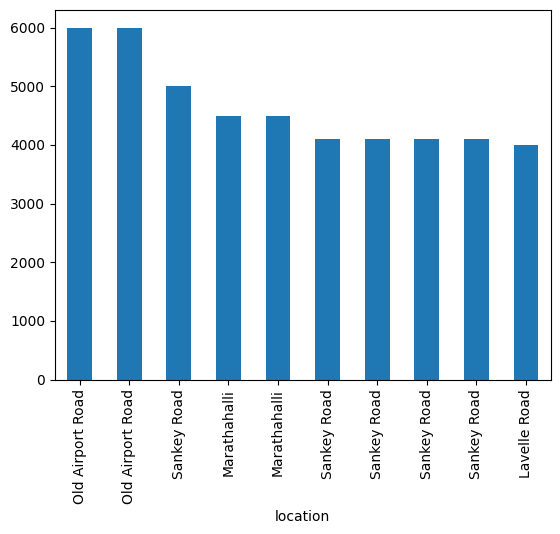

In [131]:
data.set_index('location',inplace=True)
data['approx_cost(for two people)'].nlargest(10).plot.bar()
plt.show()

#### top 10 cheapest restaurants location wise

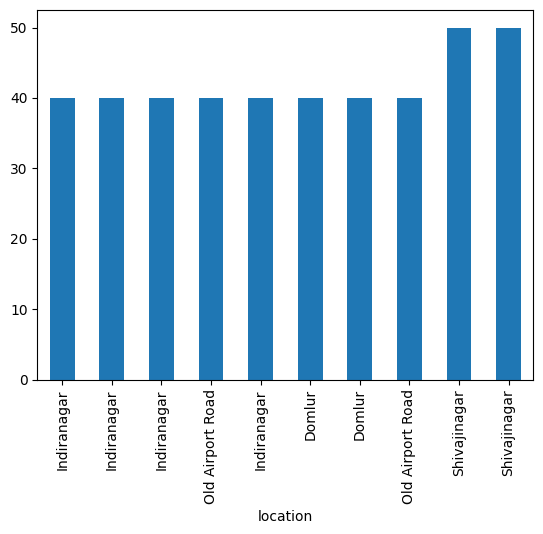

In [132]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()
plt.show()

#### All budget friendly restaurants that costs below rs 500

In [133]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head()

,location,approx_cost(for two people)
0,Banashankari,300
1,Banashankari,500
2,Banashankari,500
3,Banashankari,450
4,Banashankari,300


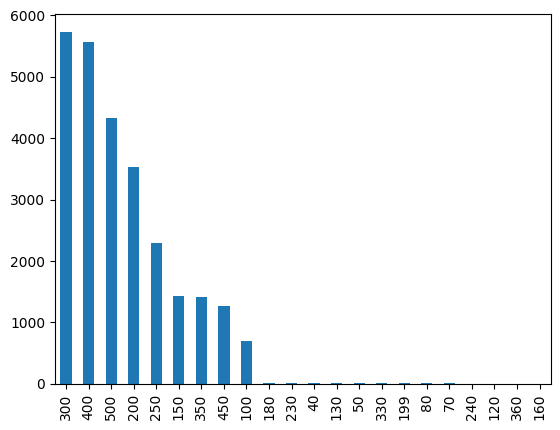

In [134]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()
plt.show()

#### Most of the dishes cost around 300 to 400

#### No of restaurants having rating greater than 4 and cost less than 500

In [135]:
len((df[(df['rate']>=4) & (df['approx_cost(for two people)'] <= 500)]['name']).value_counts())

628

In [136]:
location=[]
count=[]
for loc, location_df in df.groupby('location'):
    location.append(loc)
    count.append(len(location_df['name'].unique()))
    

In [137]:
len(location)

92

In [138]:
len(count)

92

##### creating dataframe 

In [139]:
location_df=pd.DataFrame(zip(location,count))
location_df.columns=['location','count']
location_df.set_index('location',inplace=True)

#### location with maximum number of restaurants

In [140]:
location_df.sort_values(by='count',ascending=False).head(10)

,count
location,
Whitefield,632
BTM,581
HSR,550
Marathahalli,523
Electronic City,517
Indiranagar,463
JP Nagar,400
Bannerghatta Road,361
Jayanagar,311


#### To get the names of those affordable restaurants

In [141]:
location=[]
count=[]
for loc,location_df in df.groupby('location'):
    location.append(loc)
    count.append(df['name'].unique())
    

In [142]:
afford=pd.DataFrame(zip(location,count))
afford.columns=['location','Restaurant names']
afford.set_index('location',inplace=True)

In [143]:
afford.head()

,Restaurant names
location,
BTM,"[Jalsa, Spice Elephant, San Churro Cafe, Addhu..."
Banashankari,"[Jalsa, Spice Elephant, San Churro Cafe, Addhu..."
Banaswadi,"[Jalsa, Spice Elephant, San Churro Cafe, Addhu..."
Bannerghatta Road,"[Jalsa, Spice Elephant, San Churro Cafe, Addhu..."
Basavanagudi,"[Jalsa, Spice Elephant, San Churro Cafe, Addhu..."


#### Finding best budget restaurants in any lication by usung function

In [144]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [145]:
return_budget('Whitefield',"Quick Bites")


array(['Mooch Marod', 'nu.tree'], dtype=object)

#### Areas with most number of restaurants

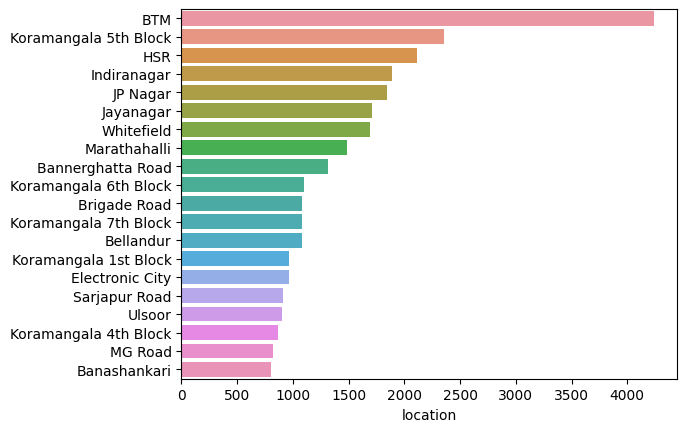

In [146]:
restaurant_location=df['location'].value_counts().head(20)
sns.barplot(restaurant_location,restaurant_location.index)
plt.show()

### Wordcloud of dishes liked by different cuisines

In [147]:
!pip install wordcloud

In [148]:
from wordcloud import WordCloud


In [149]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [150]:
df['updated_dish_liked']=df['dish_liked'].apply(lambda x:x.split(',') if type(x)==str else [''] ) ####converting to list type

In [151]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),updated_dish_liked
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,"[Pasta, Lunch Buffet, Masala Papad, Paneer ..."
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,"[Momos, Lunch Buffet, Chocolate Nirvana, Th..."
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,"[Churros, Cannelloni, Minestrone Soup, Hot ..."
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,[Masala Dosa]
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,"[Panipuri, Gol Gappe]"


In [152]:
df['rest_type'].value_counts().sort_values(ascending=False).head(10).index ##top 10 cuisines

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop',
       'Bar'],
      dtype='object')

In [153]:
top_cuisines=df['rest_type'].value_counts().sort_values(ascending=False).head(10).index

In [162]:
top_cuisines

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop',
       'Bar'],
      dtype='object')

### Creating wordcloud for every top cuisine

In [154]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            591
location                           0
rest_type                        149
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
updated_dish_liked                 0
dtype: int64

In [155]:
df.dropna(axis='index',subset=['rest_type'],inplace=True)#### dropping the null values
df.dropna(axis='index',subset=['dish_liked'],inplace=True)

In [156]:
df.isnull().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          213
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
updated_dish_liked               0
dtype: int64

#### Wordcloud for 1 cuisine

In [157]:
data=df[df['rest_type']=='Quick Bites']

In [158]:
data['dish_liked'].head(10)

3                                           Masala Dosa
31    Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34    Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
40    Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...
42                        Burgers, Fries, Hot Chocolate
43    Pane Pizza, Lava Cake, Pasta, Stuffed Garlic B...
46                                              Biryani
49                                       Paratha, Pasta
54    Pasta, Momos, Rolls, Chicken Roll, Chilli Chic...
65    Grape Juice, Chicken Grill, Chicken Tikka Roll...
Name: dish_liked, dtype: object

In [159]:
from wordcloud import STOPWORDS
stopwords=set(STOPWORDS)

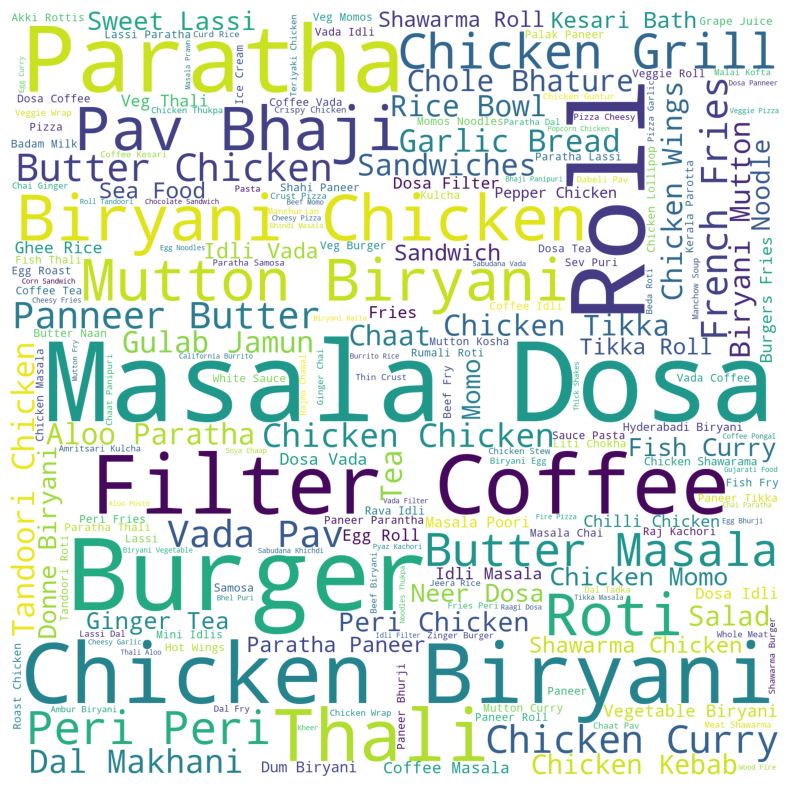

In [160]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1500,
                          height=1500,
                          stopwords=stopwords
                         ).generate(" ".join(data['dish_liked']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Restaurant type: Quick Bites


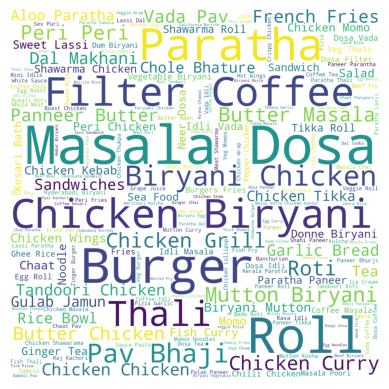

Restaurant type: Casual Dining


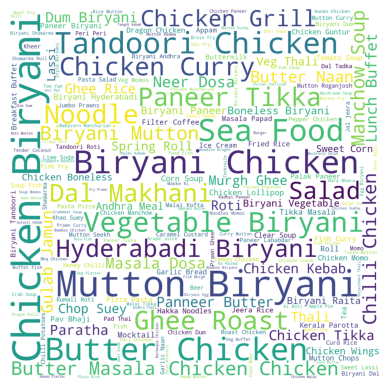

Restaurant type: Cafe


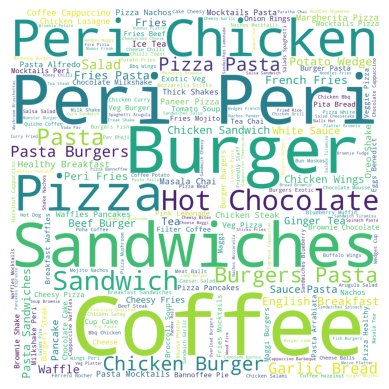

Restaurant type: Dessert Parlor


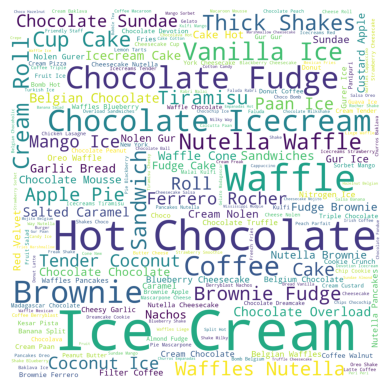

Restaurant type: Delivery


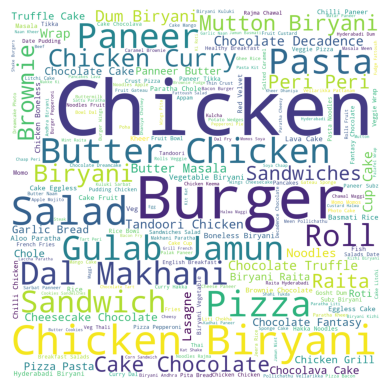

Restaurant type: Takeaway, Delivery


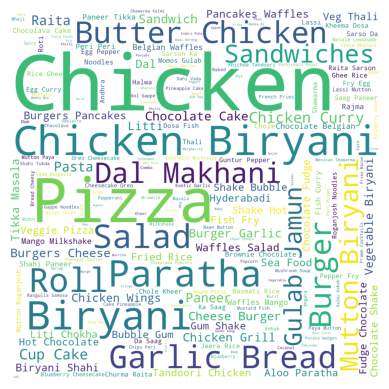

Restaurant type: Casual Dining, Bar


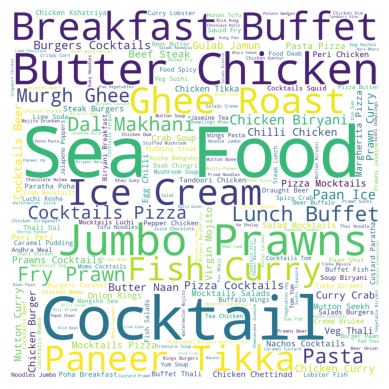

Restaurant type: Bakery


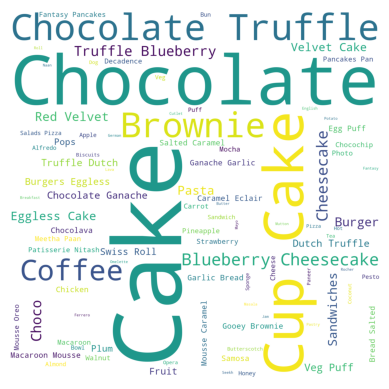

Restaurant type: Beverage Shop


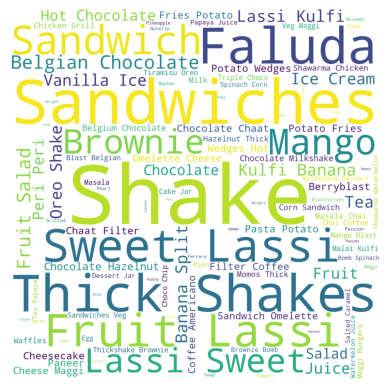

Restaurant type: Bar


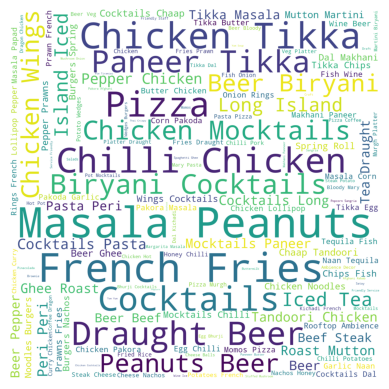

In [168]:
for i in top_cuisines:
    data=df[df['rest_type']==i]
    print('Restaurant type:',i)
    wordcloud = WordCloud(
                          background_color='white',
                          width=1500,
                          height=1500,
                          stopwords=stopwords
                         ).generate(" ".join(data['dish_liked']))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### analysing reveiws of restaurants

In [179]:
df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

#### we will try to clean the reviews using regex,and only keep text data

In [180]:
import re

In [181]:
data=df['reviews_list'][0].lower()
data

'[(\'rated 4.0\', \'rated\\n  a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.\'), (\'rated 4.0\', \'rated\\n  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.\\ncheers\'), (\'rated 2.0\', \'rated\\n  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this plac

In [195]:
data2=re.sub('[^a-zA-Z]',' ',data)
data2

SyntaxError: invalid syntax (<ipython-input-195-9ba3d90f0d3a>, line 1)

In [184]:
data3=re.sub('rated',' ',data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [185]:
data4=re.sub('x',' ',data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [186]:
data5=re.sub(' +',' ',data4)
data5#####removing multiplie spaces 

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

### Analysing review of a particular restaurant

In [191]:
data=df[df['rest_type']=='Quick Bites']
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),updated_dish_liked
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,[Masala Dosa]
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,"[Burgers, Lassi, Chicken Grill, Naan, Momo..."
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,"[Rolls, Veggie Wrap, Chocolate Fantasy, Ric..."
40,https://www.zomato.com/bangalore/chaatimes-bas...,"39, 3rd Main,4th Cross, Hanumanth Nagar, Near,...",Chaatimes,Yes,No,3.8,133,+91 8884232233,Basavanagudi,Quick Bites,"Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...","Street Food, Fast Food",200,"[('Rated 4.0', 'RATED\n Ordered pack of dabel...",[],Delivery,Banashankari,"[Dabeli, Faluda, Masala Poori, Sandwiches, ..."
42,https://www.zomato.com/bangalore/mcdonalds-ban...,"2466, Bhaskar Grand Tower, 24th Cross, Opposit...",McDonald's,Yes,No,3.9,286,080 66000666\r\n080 42005285,Banashankari,Quick Bites,"Burgers, Fries, Hot Chocolate","Burger, Fast Food",500,"[('Rated 4.0', 'RATED\n Perfect place to have...",[],Delivery,Banashankari,"[Burgers, Fries, Hot Chocolate]"


In [194]:
data['reviews_list'][3]

'[(\'Rated 4.0\', "RATED\\n  Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it\'s well managed............"), (\'Rated 2.0\', \'RATED\\n  Reached the place at 3pm on Saturday. Half of the items on the menu were over. What was annoying was is the food was cold. The taste was also very average. Only dosa and holige were good. There were very few people in the restaurant and the service was still very slow. The waiters were all standing in one corner and talking. Had to call them repeatedly.\'), (\'Rated 4.0\', \'RATED\\n  Had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. One of the good hotel there for this price.\'), (\'Rated 2.0\', \'RATED\\n  How can a Udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.Why cant they clean it? The floor even had decorative colour paper every where and lot of food.Now com

In [197]:
review=' '
for review in data['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]',' ',review)
    review=re.sub('rated',' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    review=review + str(review)
    

In [198]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(review) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 

(-0.5, 799.5, 799.5, -0.5)

### Function for creating wordcloud for each restaurant type, so that we can analyse the text reviews of customers

In [202]:
def word_cloud(top_cuisines):
    dataset=df[df['rest_type']==top_cuisines]
    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)
    wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = set(STOPWORDS), 
            min_font_size = 10).generate(total_review) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 

In [203]:
top_cuisines

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop',
       'Bar'],
      dtype='object')

In [205]:
word_cloud('Casual Dining')

## End of the notebook